## Import

In [2]:
# Selctiong Version, Google Colab only
# %tensorflow_version 1.x
try:
  %tensorflow_version 1.x # Colab only
except Exception:
    pass

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # Colab only`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [1]:
# Imports
import numpy as np
import time
import tensorflow as tf
from scipy import signal as sig
# import scipy.io
# from numpy import fft
# from plotting import newfig, savefig
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
# plt.style.use('style/elegant.mplstyle')
print(tf.__version__)

1.14.0


In [7]:
from google.colab import drive
drive.mount('/content/gdrive')
# filePath = '/content/gdrive/My Drive/Colab Notebooks/stepFunction'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
###================== Function for approximation =======================###
## Function for approximation
def step_function(x):
    # noise = np.random.normal(0, 0.1, 1)
    f = np.zeros(len(x))
    f = np.reshape(f,(-1, 1))
    for i in range(len(x)):
        if x[i] < 0:
            # f[i] = 0.2 * np.sin(6*x[i]) #+ np.random.normal(0, 0.001, 1)
            f[i] = 0
        else:
            # f[i] = 1 + 0.1 * x[i] * np.cos(18*x[i]) #+ np.random.normal(0, 0.001, 1)
            f[i] = 1
    return f

## Function for approximation
def non_linear_step_function(x):
    # noise = np.random.normal(0, 0.1, 1)
    f = np.zeros(len(x))
    f = np.reshape(f,(-1, 1))
    for i in range(len(x)):
        if x[i] < 0:
            f[i] = 0.2 * np.sin(6*x[i]) #+ np.random.normal(0, 0.001, 1)
            # f[i] = 0
        else:
            f[i] = 1 + 0.1 * x[i] * np.cos(18*x[i]) #+ np.random.normal(0, 0.001, 1)
            # f[i] = 1
    return f


## Function for approximation
def smooth_function(x):
    # noise = np.random.normal(0, 0.1, 1)
    f = np.zeros(len(x))
    f = np.reshape(f,(-1, 1))
    for i in range(len(x)):
        f[i] = (x[i]**3 - x[i])*(np.sin(7*x[i]) / 7.0) + np.sin(12*x[i])
    return f

In [6]:
np.random.seed(1234)
tf.set_random_seed(1234)
# np.set_printoptions(threshold=sys.maxsize)

# Non Linear Step Function
## Reproduction:  
This is the reproduction of the idea of [Locally adaptive activation functions with slope recovery term for deep and
physics-informed neural networks](https://arxiv.org/pdf/1909.12228.pdf) paper.
Network Parameters:
<ul>
  <li>Layers = [1] + 4*[50] + [1]</li>
  <li>Number of Points, N = 3,000</li>
  <li>Slope recovery term = exp()</li>
  <li>Maximum Iteration, nmax = 15,000</li>
</ul>

In [2]:
# def hyper_parameters_A(size):
#     a = tf.Variable(tf.constant(0.1, shape=size))
#     return a

# def hyper_parameters(size):
#     return tf.Variable(tf.random_normal(shape=size, mean=0.0, stddev=0.1))
####=================== Initialization of the hyperparameters ==================#########
## Xavier initilizer
def xavier_init(size):
    in_dim = size[0]
    out_dim = size[1]
    xavier_stddev = np.sqrt(2/(in_dim + out_dim))
    return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev = xavier_stddev),dtype=tf.float32)

def hyper_parameters_A(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a

def hyper_parameters_B(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a


# def hyper_parameters_B(size):
#     b = tf.Variable(tf.constant(0.1, shape=size))
#     return b

def hyper_parameters(size):
    # return tf.Variable(tf.random_normal(shape=size, mean = 0.0, stddev= 0.1))
    return tf.Variable(xavier_init(size=size))

# def DNN(X, W, b, a_NLLAF, a_LLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#         if i % 2 == 0:
#             A = a_LLLAF[i]*tf.sin(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#         else:
#             A = a_LLLAF[i]*tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y
    
def DNN(X, W, b, a_NLLAF, lb, ub):
    A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
    L = len(W)
    for i in range(L-1):
      A = tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
    Y = tf.add(tf.matmul(A, W[-1]), b[-1])
    return Y


def predict():
    pass

Text(0.5, 0.98, 'Function')

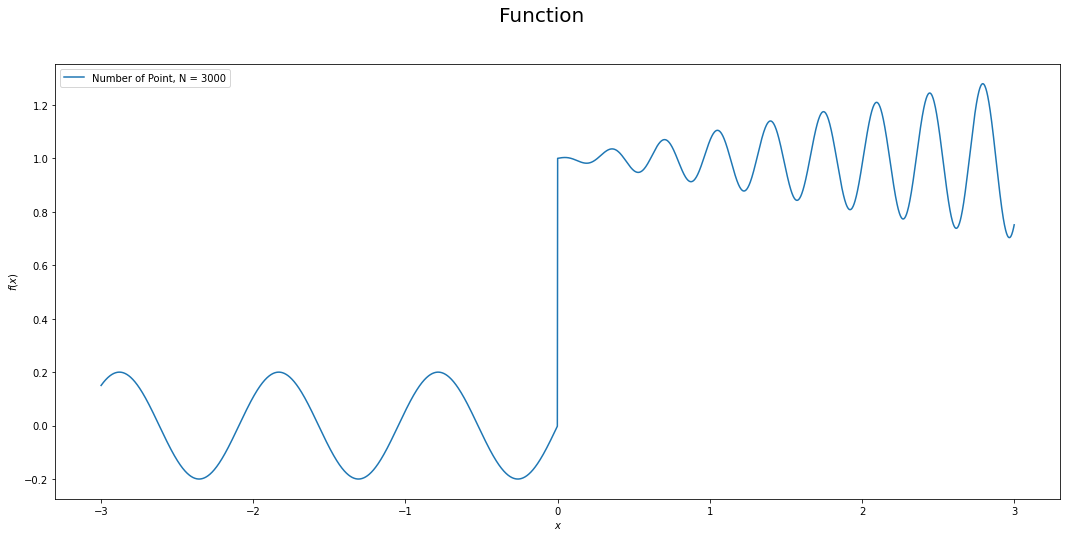

In [109]:
##====== Data Preparation ==========###
N = 3000
x = np.linspace(-3, 3, N + 1)
lb = x[0] # lower bound
ub = x[-1] # upper bound
x = np.reshape(x, (-1, 1))

# # N = 300
# t = np.linspace(-1, 1, N + 1)
# y = np.sin(np.tanh(t))
# # y_ = np.cos(np.sin(t))
# y = np.sin(2*np.pi*x)
y = non_linear_step_function(x)
# y = sig.sawtooth(2 * np.pi * 1 * x)
fig = plt.figure(figsize=[18, 8])
# plt.plot(x,y)
plt.plot(x, y, label = 'Number of Point, N = %d' %N)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')
fig.suptitle('Function', fontsize=20)
# fig.savefig('/content/drive/My Drive/Colab Notebooks/Current/sawtooth_wave.png')

In [4]:
####======= Graph ===========#########
layers = [1] + [2] + [1]
W = [hyper_parameters([layers[l-1], layers[l]]) for l in range(1, len(layers))]
b = [hyper_parameters([1, layers[l]]) for l in range(1, len(layers))]
a_NLLAF = [hyper_parameters_A([1, layers[l]]) for l in range(1, len(layers))]
# a_LLLAF = [hyper_parameters_B([1, 1]) for l in range(1, len(layers))]
print(a_NLLAF)

[<tf.Variable 'Variable_33:0' shape=(1, 2) dtype=float32_ref>, <tf.Variable 'Variable_34:0' shape=(1, 1) dtype=float32_ref>]


In [111]:
# ##======= Slope recovery term =======###
# def S(a):
#     y = 0
#     for i in range(0, len(a)):
#         if i % 2 == 0:
#           y += tf.exp(tf.reduce_mean(a[i]))
#         else:
#           y += tf.tanh(tf.reduce_mean(a[i]))
#     slope_term = 1/(tf.reduce_mean(y)) 
#     return slope_term
##======= Slope recovery term =======###
def S(a):
    y = 0
    for i in range(0, len(a)):
        y += tf.exp(tf.reduce_mean(a[i]))
    slope_term = 1/(tf.reduce_mean(y)) 
    return slope_term

In [112]:
###### Placeholder ########
x_train = tf.placeholder(tf.float32, shape=[None, 1])
y_train = tf.placeholder(tf.float32, shape=[None, 1])
# y_pred = DNN(x_train, W, b, a_NLLAF, a_LLLAF, lb, ub)

###============= Neural Network ========###
y_pred = DNN(x_train, W, b, a_NLLAF, lb, ub)
obj_loss = tf.reduce_mean(tf.square(y_pred - y_train)) + S(a_NLLAF) # + S(a_NLLAF) + S(a_LLLAF)  ## Rick function -> need to minimizer

# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])))))

# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])) 
#             + tf.exp(tf.reduce_mean(a[5])))))

MSE_history = []
Solution_history = []

start_time = time.time()

# for i in range(1, 2):
    
    # train = tf.train.AdamOptimizer(10**-i).minimize(loss)
lr = 2.0e-4
optimizer = tf.train.AdamOptimizer(lr).minimize(obj_loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()
sess = tf.Session()

init = tf.global_variables_initializer()   


sess.run(init)
nmax = 15000
n = 0

MSE_hist = []
Sol = []
# a_hist = []
# print(datetime.datetime.now())
print("For Learning rate = ", lr)

while n <= nmax:
    n = n + 1
    obj_loss_, _, y_ = sess.run([obj_loss, optimizer, y_pred], feed_dict={x_train: x, y_train: y})
    # err = obj_loss
    # a_value = sess.run(a, feed_dict={x_train: x, y_train: y})
    # a_value = np.concatenate(a_value, axis=1)
    # a_value = np.reshape(a_value, (-1, 1))
    # a_hist.append(a_value)

    MSE_hist.append(obj_loss_)    # a_hist = []
    # print(y_.shape)

    if n == 2000 or n == 8000 or n == 15000:
        # Sol.append(y_)
        # print(y_.shape)
        print('Steps : %d, loss: %0.3e'%(n, obj_loss_))
    if n == 15000:
        Sol.append(y_)

MSE_history.append(MSE_hist)
Solution_history.append(Sol)

##==================!Start Time!====================##
elapsed = time.time() - start_time                  
hours, rem = divmod(elapsed, 3600)                
minutes, seconds = divmod(rem, 60)                 
print('Training time: {:0>2}:{:0>2}:{:05.2f}'.format(int(hours), int(minutes), seconds))

MSE_history.append(MSE_hist)
# trainLoss_history.append(train_loss_hist)
# testLoss_history.append(test_loss_hist)
Solution_history.append(Sol)
##==================!End Time!======================##

##================ Save the Model ================##
# /content/gdrive/My Drive/Colab Notebooks/Experiment
save_path = saver.save(sess, "/content/gdrive/My Drive/Colab Notebooks/Experiment/Model/reproduction.ckpt")
print("Model saved in path: %s" % save_path)
tf.reset_default_graph()

For Learning rate =  0.0002
Steps : 2000, loss: 1.752e-01
Steps : 8000, loss: 8.687e-02
Steps : 15000, loss: 3.343e-02
Training time: 00:00:37.40
Model saved in path: /content/gdrive/My Drive/Colab Notebooks/Experiment/Model/reproduction.ckpt


Text(0.5, 0.98, 'Objective Loss vs Iteration Plot')

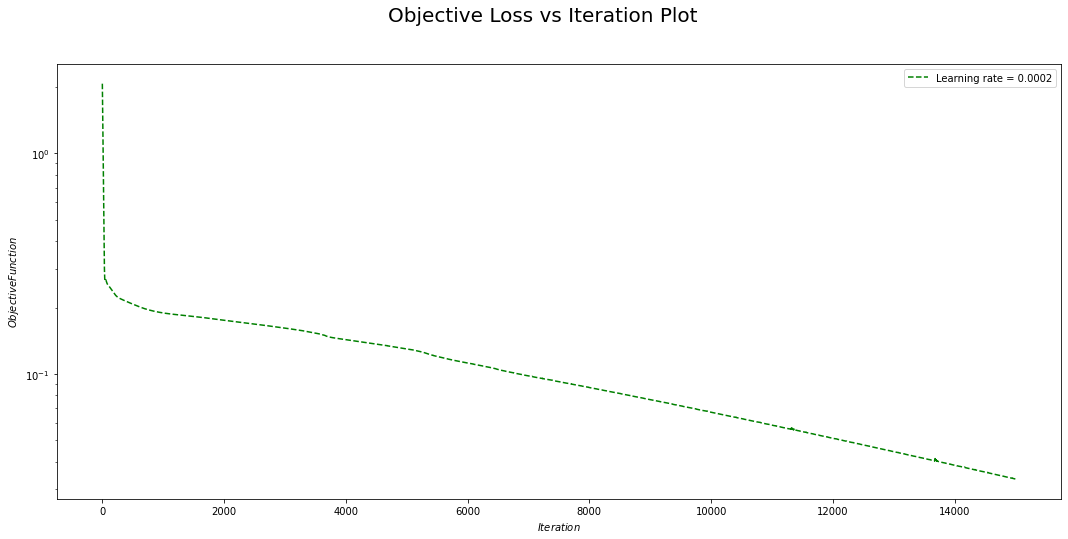

In [113]:
### Risk function ####
fig = plt.figure(figsize=[18, 8])
plt.semilogy(MSE_history[0], 'g--', label = 'Learning rate = %0.4f' %lr)
plt.xlabel('$Iteration$')
plt.ylabel('$Objective Function$')
plt.legend(loc='best')
fig.suptitle('Objective Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/MSE_Loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

Text(0.5, 0.98, 'Approximation')

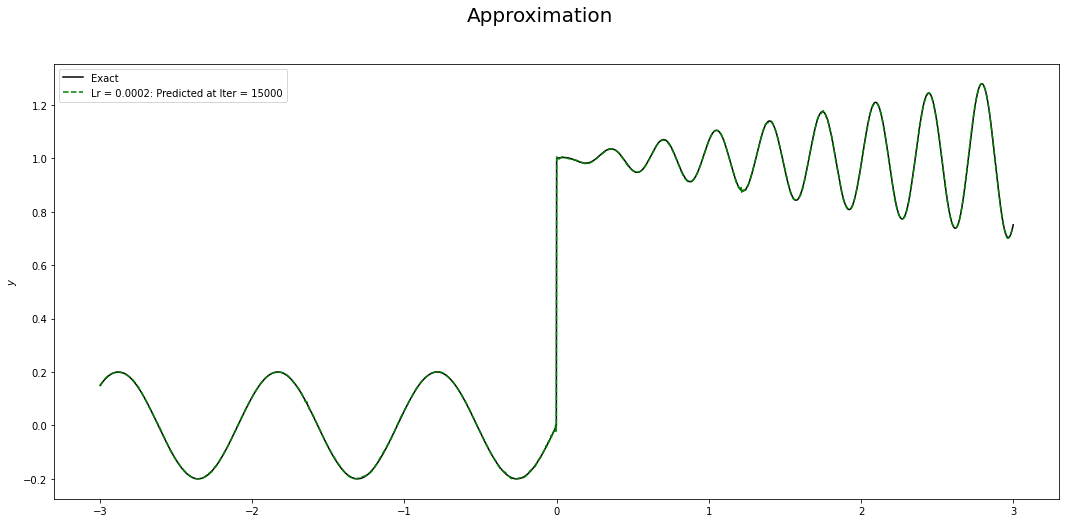

In [114]:
## Approximation ##
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)
fig = plt.figure(figsize=[18, 8])
plt.plot(x, y, 'k',  label = 'Exact')
# plt.plot(x[0:-1], Sol_15000_1[0:-1,-1], 'g--',  label = 'Lr = 0.0001: Predicted at Iter = 60000')
plt.plot(x, Sol_15000_1, 'g--',  label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.ylabel('$y$')
plt.legend(loc='best')
fig.suptitle('Approximation', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Approx_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

Text(0.5, 0.98, 'Loss vs Iteration Plot')

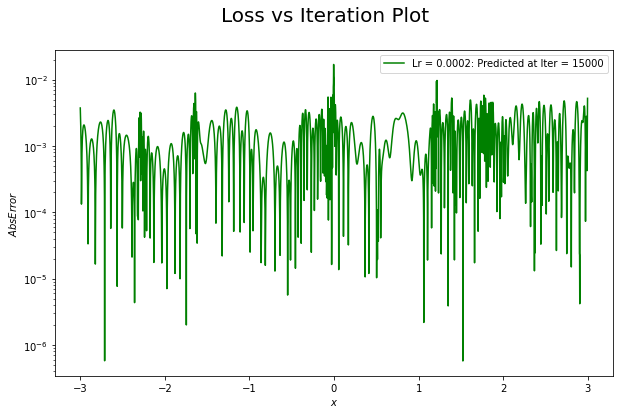

In [115]:
## Abs Error ###
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)[0:-1,-1].flatten()[:, None]
error_15000_1 = np.abs(Sol_15000_1 - y[0:-1])
fig = plt.figure(figsize=[10, 6])
plt.semilogy(x[0:-1], error_15000_1, 'g', label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.xlabel('$x$')
plt.ylabel('$Abs Error$')
plt.legend(loc='best')
# plt.legend(loc='best')
fig.suptitle('Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Abs_loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

With the same setup try to approximate the in $-7 \leq x \leq 7$

Text(0.5, 0.98, 'Function')

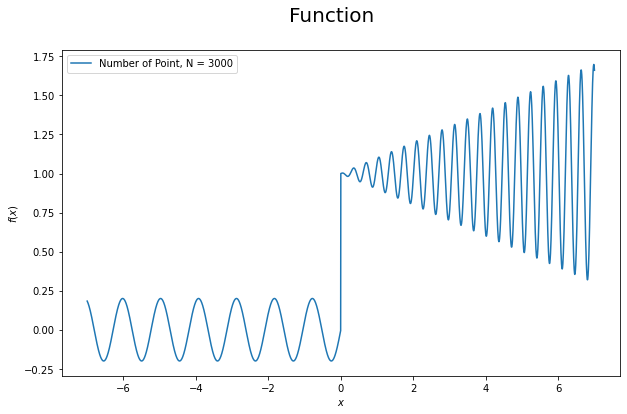

In [8]:
##====== Data Preparation ==========###
N = 3000
x = np.linspace(-7, 7, N + 1)
lb = x[0] # lower bound
ub = x[-1] # upper bound
x = np.reshape(x, (-1, 1))

# # N = 300
# t = np.linspace(-1, 1, N + 1)
# y = np.sin(np.tanh(t))
# # y_ = np.cos(np.sin(t))
# y = np.sin(2*np.pi*x)
y = non_linear_step_function(x)
# y = sig.sawtooth(2 * np.pi * 1 * x)
fig = plt.figure(figsize=[10, 6])
# plt.plot(x,y)
plt.plot(x, y, label = 'Number of Point, N = %d' %N)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')
fig.suptitle('Function', fontsize=20)
# fig.savefig('/content/drive/My Drive/Colab Notebooks/Current/sawtooth_wave.png')

For Learning rate =  0.0002
Steps : 2000, loss: 2.071e-01
Steps : 8000, loss: 1.187e-01
Steps : 15000, loss: 4.748e-02
Training time: 00:00:39.53
Model saved in path: /content/gdrive/My Drive/Colab Notebooks/Experiment/Model/reproduction_-7<=x<=7.ckpt


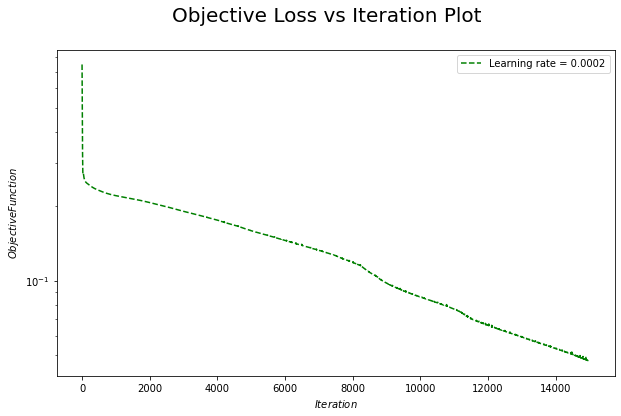

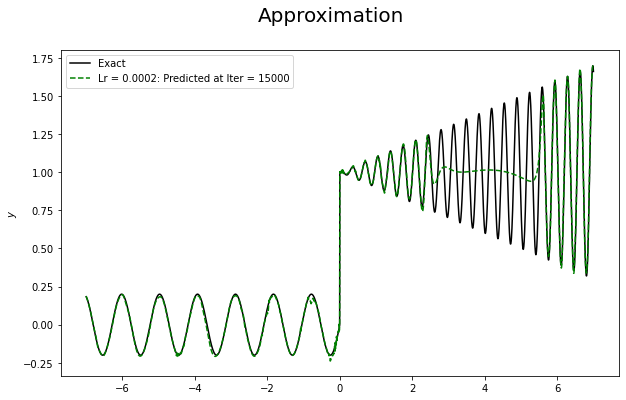

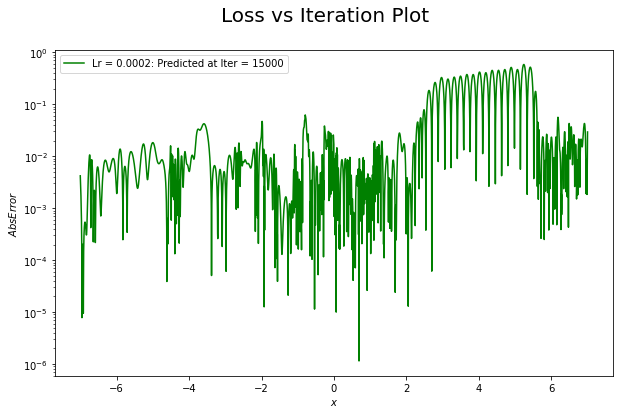

In [10]:
###################################
#
#        Solution Begins          #
#
###################################
# def hyper_parameters_A(size):
#     a = tf.Variable(tf.constant(0.1, shape=size))
#     return a

# def hyper_parameters(size):
#     return tf.Variable(tf.random_normal(shape=size, mean=0.0, stddev=0.1))
####=================== Initialization of the hyperparameters ==================#########
## Xavier initilizer
def xavier_init(size):
    in_dim = size[0]
    out_dim = size[1]
    xavier_stddev = np.sqrt(2/(in_dim + out_dim))
    return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev = xavier_stddev),dtype=tf.float32)

def hyper_parameters_A(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a

def hyper_parameters_B(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a


# def hyper_parameters_B(size):
#     b = tf.Variable(tf.constant(0.1, shape=size))
#     return b

def hyper_parameters(size):
    # return tf.Variable(tf.random_normal(shape=size, mean = 0.0, stddev= 0.1))
    return tf.Variable(xavier_init(size=size))

# def DNN(X, W, b, a_NLLAF, a_LLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#         if i % 2 == 0:
#             A = a_LLLAF[i]*tf.sin(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#         else:
#             A = a_LLLAF[i]*tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y

def DNN(X, W, b, a_NLLAF, lb, ub):
    A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
    L = len(W)
    for i in range(L-1):
      A = tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
    Y = tf.add(tf.matmul(A, W[-1]), b[-1])
    return Y


def predict():
    pass



####======= Network Architecture ===========#########
layers = [1] + 4*[50] + [1]
W = [hyper_parameters([layers[l-1], layers[l]]) for l in range(1, len(layers))]
b = [hyper_parameters([1, layers[l]]) for l in range(1, len(layers))]
a_NLLAF = [hyper_parameters_A([1, layers[l]]) for l in range(1, len(layers))]
# a_LLLAF = [hyper_parameters_B([1, 1]) for l in range(1, len(layers))]
# # print(a)

##======= Slope recovery term =======###
def S(a):
    y = 0
    for i in range(0, len(a)):
        y += tf.exp(tf.reduce_mean(a[i]))
    slope_term = 1/(tf.reduce_mean(y)) 
    return slope_term

######=========== Placeholder ==============########
x_train = tf.placeholder(tf.float32, shape=[None, 1])
y_train = tf.placeholder(tf.float32, shape=[None, 1])


###============== Neural Network ================####
y_pred = DNN(x_train, W, b, a_NLLAF, lb, ub)
# y_pred = DNN(x_train, W, b, a_NLLAF, a_LLLAF, lb, ub)

##========================== Obj Function ===============###
obj_loss = tf.reduce_mean(tf.square(y_pred - y_train)) + S(a_NLLAF) # + S(a_NLLAF) + S(a_LLLAF)  ## Rick function -> need to minimizer
##========================== Obj Function ===============###
# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])))))

# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])) 
#             + tf.exp(tf.reduce_mean(a[5])))))

MSE_history = []
Solution_history = []

start_time = time.time()

# for i in range(1, 2):
    
    # train = tf.train.AdamOptimizer(10**-i).minimize(loss)
lr = 2.0e-4
optimizer = tf.train.AdamOptimizer(lr).minimize(obj_loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

sess = tf.Session()

init = tf.global_variables_initializer()   


sess.run(init)
nmax = 15000
n = 0

MSE_hist = []
Sol = []
# a_hist = []

print("For Learning rate = ", lr)

while n <= nmax:
    n = n + 1
    obj_loss_, _, y_ = sess.run([obj_loss, optimizer, y_pred], feed_dict={x_train: x, y_train: y})
    # err = obj_loss
    # a_value = sess.run(a, feed_dict={x_train: x, y_train: y})
    # a_value = np.concatenate(a_value, axis=1)
    # a_value = np.reshape(a_value, (-1, 1))
    # a_hist.append(a_value)

    MSE_hist.append(obj_loss_)    # a_hist = []
    # print(y_.shape)

    if n == 2000 or n == 8000 or n == 15000:
        # Sol.append(y_)
        # print(y_.shape)
        print('Steps : %d, loss: %0.3e'%(n, obj_loss_))
    if n == 15000:
        Sol.append(y_)

MSE_history.append(MSE_hist)
Solution_history.append(Sol)

##==================!Start Time!====================##
elapsed = time.time() - start_time                  
hours, rem = divmod(elapsed, 3600)                
minutes, seconds = divmod(rem, 60)                 
print('Training time: {:0>2}:{:0>2}:{:05.2f}'.format(int(hours), int(minutes), seconds))

MSE_history.append(MSE_hist)
# trainLoss_history.append(train_loss_hist)
# testLoss_history.append(test_loss_hist)
Solution_history.append(Sol)
##==================!End Time!======================##

##================ Save the Model ================##
# /content/gdrive/My Drive/Colab Notebooks/Experiment
save_path = saver.save(sess, "/content/gdrive/My Drive/Colab Notebooks/Experiment/Model/reproduction_-7<=x<=7.ckpt")
print("Model saved in path: %s" % save_path)


### Risk function ####
fig = plt.figure(figsize=[10, 6])
plt.semilogy(MSE_history[0], 'g--', label = 'Learning rate = %0.4f' %lr)
plt.xlabel('$Iteration$')
plt.ylabel('$Objective Function$')
plt.legend(loc='best')
fig.suptitle('Objective Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/MSE_Loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

## Approximation ##
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)
fig = plt.figure(figsize=[10, 6])
plt.plot(x, y, 'k',  label = 'Exact')
# plt.plot(x[0:-1], Sol_15000_1[0:-1,-1], 'g--',  label = 'Lr = 0.0001: Predicted at Iter = 60000')
plt.plot(x, Sol_15000_1, 'g--',  label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.ylabel('$y$')
plt.legend(loc='best')
fig.suptitle('Approximation', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Approx_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')


## Abs Error ###
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)[0:-1,-1].flatten()[:, None]
error_15000_1 = np.abs(Sol_15000_1 - y[0:-1])
fig = plt.figure(figsize=[10, 6])
plt.semilogy(x[0:-1], error_15000_1, 'g', label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.xlabel('$x$')
plt.ylabel('$Abs Error$')
plt.legend(loc='best')
# plt.legend(loc='best')
fig.suptitle('Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Abs_loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')
tf.reset_default_graph()

So, current network failed to approximate. 

## Increase the number of Layer and Neuron: 

For Learning rate =  0.0002
Steps : 2000, loss: 1.297e-01
Steps : 8000, loss: 1.030e-01
Steps : 15000, loss: 7.124e-02
Training time: 00:07:34.50
Model saved in path: /content/gdrive/My Drive/Colab Notebooks/Experiment/Model/reproduction_Layer_expantion_-7<=x<=7.ckpt


Text(0.5, 0.98, 'Loss vs Iteration Plot')

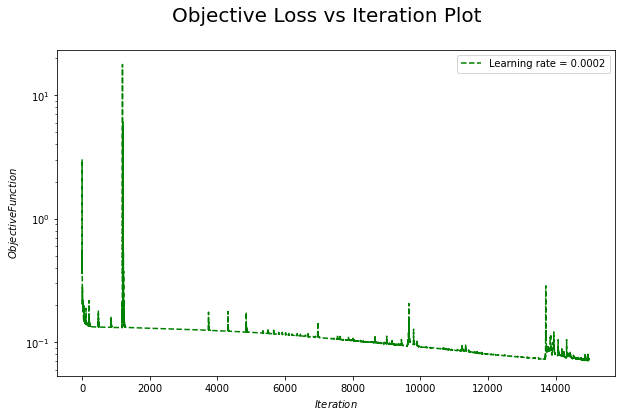

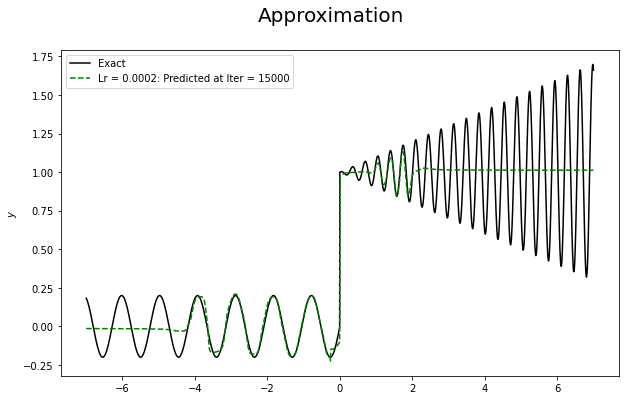

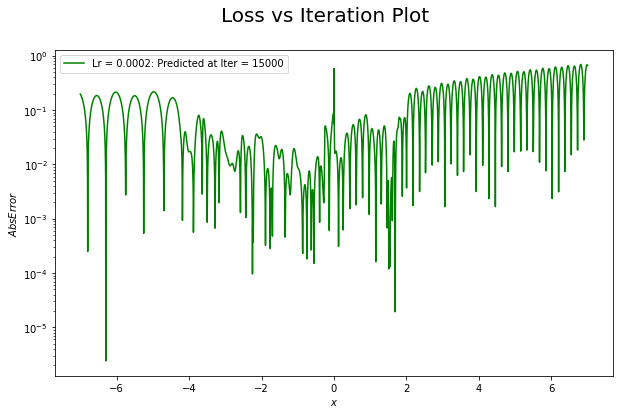

In [11]:
###################################
#
#        Solution Begins          #
# Layer = 1 + 10*1000 + 1
###################################
# def hyper_parameters_A(size):
#     a = tf.Variable(tf.constant(0.1, shape=size))
#     return a

# def hyper_parameters(size):
#     return tf.Variable(tf.random_normal(shape=size, mean=0.0, stddev=0.1))
####=================== Initialization of the hyperparameters ==================#########
## Xavier initilizer
def xavier_init(size):
    in_dim = size[0]
    out_dim = size[1]
    xavier_stddev = np.sqrt(2/(in_dim + out_dim))
    return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev = xavier_stddev),dtype=tf.float32)

def hyper_parameters_A(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a

def hyper_parameters_B(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a


# def hyper_parameters_B(size):
#     b = tf.Variable(tf.constant(0.1, shape=size))
#     return b

def hyper_parameters(size):
    # return tf.Variable(tf.random_normal(shape=size, mean = 0.0, stddev= 0.1))
    return tf.Variable(xavier_init(size=size))

# def DNN(X, W, b, a_NLLAF, a_LLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#         if i % 2 == 0:
#             A = a_LLLAF[i]*tf.sin(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#         else:
#             A = a_LLLAF[i]*tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y
    
def DNN(X, W, b, a_NLLAF, lb, ub):
    A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
    L = len(W)
    for i in range(L-1):
      A = tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
    Y = tf.add(tf.matmul(A, W[-1]), b[-1])
    return Y


def predict():
    pass



####======= Network Architecture ===========#########
layers = [1] + 10*[1000] + [1]
W = [hyper_parameters([layers[l-1], layers[l]]) for l in range(1, len(layers))]
b = [hyper_parameters([1, layers[l]]) for l in range(1, len(layers))]
a_NLLAF = [hyper_parameters_A([1, layers[l]]) for l in range(1, len(layers))]
# a_LLLAF = [hyper_parameters_B([1, 1]) for l in range(1, len(layers))]
# # print(a)

##======= Slope recovery term =======###
def S(a):
    y = 0
    for i in range(0, len(a)):
        y += tf.exp(tf.reduce_mean(a[i]))
    slope_term = 1/(tf.reduce_mean(y)) 
    return slope_term

######=========== Placeholder ==============########
x_train = tf.placeholder(tf.float32, shape=[None, 1])
y_train = tf.placeholder(tf.float32, shape=[None, 1])


###============== Neural Network ================####
y_pred = DNN(x_train, W, b, a_NLLAF, lb, ub)
# y_pred = DNN(x_train, W, b, a_NLLAF, a_LLLAF, lb, ub)

##========================== Obj Function ===============###
obj_loss = tf.reduce_mean(tf.square(y_pred - y_train)) + S(a_NLLAF) # + S(a_NLLAF) + S(a_LLLAF)  ## Rick function -> need to minimizer
##========================== Obj Function ===============###
# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])))))

# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])) 
#             + tf.exp(tf.reduce_mean(a[5])))))

MSE_history = []
Solution_history = []

start_time = time.time()

# for i in range(1, 2):
    
    # train = tf.train.AdamOptimizer(10**-i).minimize(loss)
lr = 2.0e-4
optimizer = tf.train.AdamOptimizer(lr).minimize(obj_loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

sess = tf.Session()

init = tf.global_variables_initializer()   


sess.run(init)
nmax = 15000
n = 0

MSE_hist = []
Sol = []
# a_hist = []

print("For Learning rate = ", lr)

while n <= nmax:
    n = n + 1
    obj_loss_, _, y_ = sess.run([obj_loss, optimizer, y_pred], feed_dict={x_train: x, y_train: y})
    # err = obj_loss
    # a_value = sess.run(a, feed_dict={x_train: x, y_train: y})
    # a_value = np.concatenate(a_value, axis=1)
    # a_value = np.reshape(a_value, (-1, 1))
    # a_hist.append(a_value)

    MSE_hist.append(obj_loss_)    # a_hist = []
    # print(y_.shape)

    if n == 2000 or n == 8000 or n == 15000:
        # Sol.append(y_)
        # print(y_.shape)
        print('Steps : %d, loss: %0.3e'%(n, obj_loss_))
    if n == 15000:
        Sol.append(y_)

MSE_history.append(MSE_hist)
Solution_history.append(Sol)

##==================!Start Time!====================##
elapsed = time.time() - start_time                  
hours, rem = divmod(elapsed, 3600)                
minutes, seconds = divmod(rem, 60)                 
print('Training time: {:0>2}:{:0>2}:{:05.2f}'.format(int(hours), int(minutes), seconds))

MSE_history.append(MSE_hist)
# trainLoss_history.append(train_loss_hist)
# testLoss_history.append(test_loss_hist)
Solution_history.append(Sol)
##==================!End Time!======================##

##================ Save the Model ================##
# /content/gdrive/My Drive/Colab Notebooks/Experiment
save_path = saver.save(sess, "/content/gdrive/My Drive/Colab Notebooks/Experiment/Model/reproduction_Layer_expantion_-7<=x<=7.ckpt")
print("Model saved in path: %s" % save_path)


### Risk function ####
fig = plt.figure(figsize=[10, 6])
plt.semilogy(MSE_history[0], 'g--', label = 'Learning rate = %0.4f' %lr)
plt.xlabel('$Iteration$')
plt.ylabel('$Objective Function$')
plt.legend(loc='best')
fig.suptitle('Objective Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/MSE_Loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

## Approximation ##
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)
fig = plt.figure(figsize=[10, 6])
plt.plot(x, y, 'k',  label = 'Exact')
# plt.plot(x[0:-1], Sol_15000_1[0:-1,-1], 'g--',  label = 'Lr = 0.0001: Predicted at Iter = 60000')
plt.plot(x, Sol_15000_1, 'g--',  label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.ylabel('$y$')
plt.legend(loc='best')
fig.suptitle('Approximation', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Approx_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')


## Abs Error ###
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)[0:-1,-1].flatten()[:, None]
error_15000_1 = np.abs(Sol_15000_1 - y[0:-1])
fig = plt.figure(figsize=[10, 6])
plt.semilogy(x[0:-1], error_15000_1, 'g', label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.xlabel('$x$')
plt.ylabel('$Abs Error$')
plt.legend(loc='best')
# plt.legend(loc='best')
fig.suptitle('Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Abs_loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

Again, current network failed to approximate. 

## Modified Architechture
Combination of activation function with Neuron wise adaptive slope control. 


Text(0.5, 0.98, 'Function')

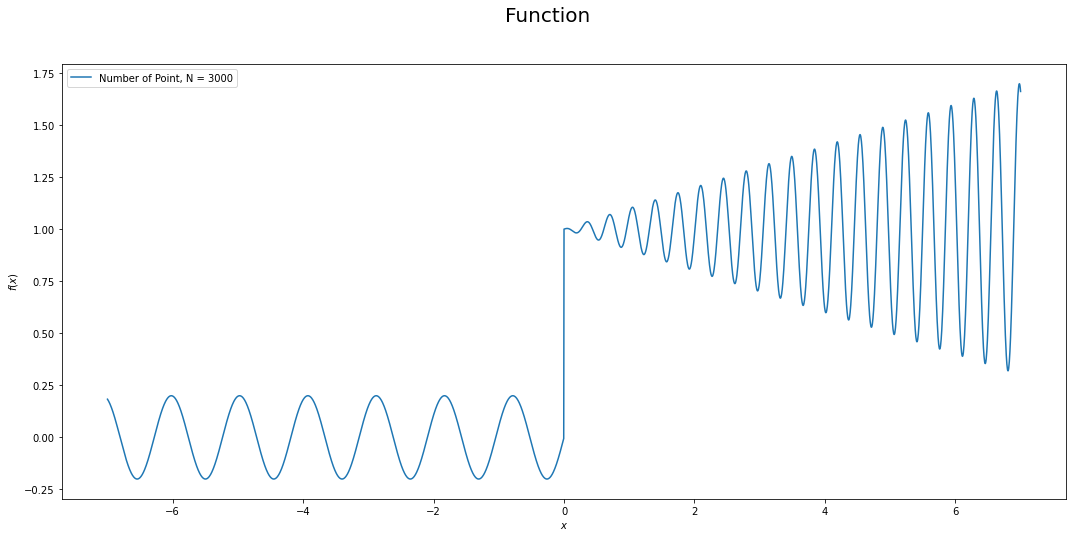

In [119]:
##====== Data Preparation ==========###
N = 3000
x = np.linspace(-7, 7, N + 1)
lb = x[0] # lower bound
ub = x[-1] # upper bound
x = np.reshape(x, (-1, 1))

# # N = 300
# t = np.linspace(-1, 1, N + 1)
# y = np.sin(np.tanh(t))
# # y_ = np.cos(np.sin(t))
# y = np.sin(2*np.pi*x)
y = non_linear_step_function(x)
# y = sig.sawtooth(2 * np.pi * 1 * x)
fig = plt.figure(figsize=[18, 8])
# plt.plot(x,y)
plt.plot(x, y, label = 'Number of Point, N = %d' %N)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')
fig.suptitle('Function', fontsize=20)
# fig.savefig('/content/drive/My Drive/Colab Notebooks/Current/sawtooth_wave.png')

For Learning rate =  0.0002
Steps : 2000, loss: 3.052e-01
Steps : 8000, loss: 1.205e-01
Steps : 15000, loss: 4.188e-02
Training time: 00:00:42.73
Model saved in path: /content/gdrive/My Drive/Colab Notebooks/Experiment/Model/New_Architecture_-7<=x<=7.ckpt


Text(0.5, 0.98, 'Objective Loss vs Iteration Plot')

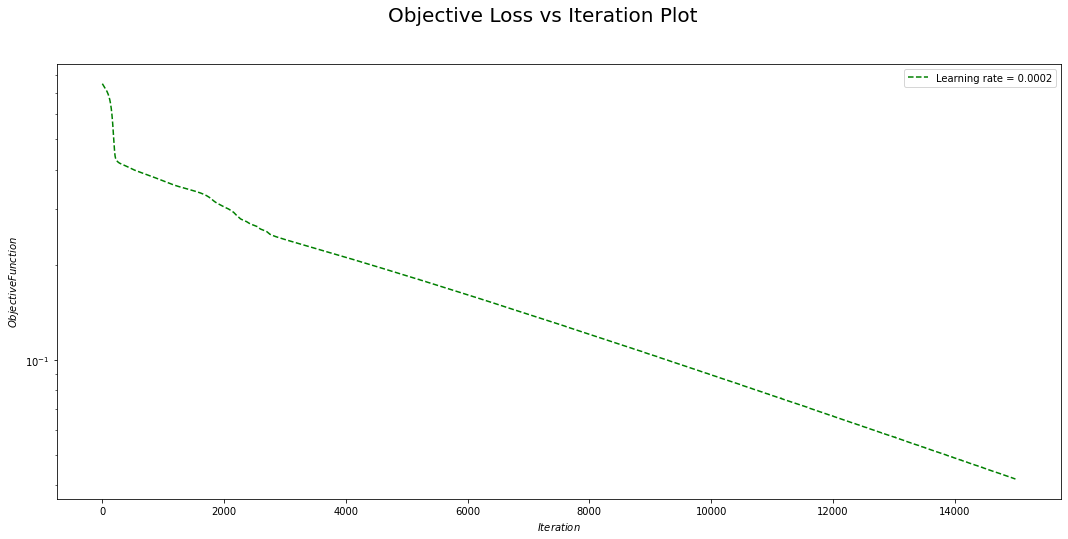

In [13]:
###################################
#   এইটা প্রামাণ্য। এইটার সাপেক্ষে বেঞ্চমার্ক হবে। #  
#        Solution Begins          #
#
###################################
# def hyper_parameters_A(size):
#     a = tf.Variable(tf.constant(0.1, shape=size))
#     return a

# def hyper_parameters(size):
#     return tf.Variable(tf.random_normal(shape=size, mean=0.0, stddev=0.1))
####=================== Initialization of the hyperparameters ==================#########
##================= Xavier initilizer ========######
def xavier_init(size):
    in_dim = size[0]
    out_dim = size[1]
    xavier_stddev = np.sqrt(2/(in_dim + out_dim))
    return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev = xavier_stddev),dtype=tf.float32)

def hyper_parameters_A(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a

def hyper_parameters_B(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a


# def hyper_parameters_B(size):
#     b = tf.Variable(tf.constant(0.1, shape=size))
#     return b

def hyper_parameters(size):
    # return tf.Variable(tf.random_normal(shape=size, mean = 0.0, stddev= 0.1))
    return tf.Variable(xavier_init(size=size))

def DNN(X, W, b, a_NLLAF, a_LLLAF, lb, ub):
    A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
    L = len(W)
    for i in range(L-1):
        if i % 2 == 0:
            A = a_LLLAF[i]*tf.sin(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
        else:
            A = a_LLLAF[i]*tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
    Y = tf.add(tf.matmul(A, W[-1]), b[-1])
    return Y

# def DNN(X, W, b, a_NLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#         if i % 2 == 0:
#             A = tf.sin(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#         else:
#             A = tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y
    
# def DNN(X, W, b, a_NLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#       A = tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y

    
# def DNN(X, W, b, a_NLLAF, a_LLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#       A = a_LLLAF[i]*tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y


def predict():
    pass

####======= Network Architecture ===========#########
layers = [1] + 4*[50] + [1]
W = [hyper_parameters([layers[l-1], layers[l]]) for l in range(1, len(layers))]
b = [hyper_parameters([1, layers[l]]) for l in range(1, len(layers))]
a_NLLAF = [hyper_parameters_A([1, layers[l]]) for l in range(1, len(layers))]
a_LLLAF = [hyper_parameters_B([1, 1]) for l in range(1, len(layers))]
# # print(a)

##======= Slope recovery term =======###
def S(a):
    y = 0
    for i in range(0, len(a)):
        y += tf.exp(tf.reduce_mean(a[i]))
    slope_term = 1/(tf.reduce_mean(y)) 
    return slope_term

######=========== Placeholder ==============########
x_train = tf.placeholder(tf.float32, shape=[None, 1])
y_train = tf.placeholder(tf.float32, shape=[None, 1])

###============== Neural Network ================####
# y_pred = DNN(x_train, W, b, a_NLLAF, lb, ub)
y_pred = DNN(x_train, W, b, a_NLLAF, a_LLLAF, lb, ub)
# y_pred = DNN(x_train, W, b, a_NLLAF, lb, ub)
##========================== Obj Function ===============###
obj_loss = tf.reduce_mean(tf.square(y_pred - y_train)) + S(a_NLLAF)  + S(a_NLLAF) # + S(a_LLLAF)  ## Rick function -> need to minimizer
##========================== Obj Function ===============###
# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])))))

# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])) 
#             + tf.exp(tf.reduce_mean(a[5])))))

MSE_history = []
Solution_history = []

start_time = time.time()

# for i in range(1, 2):
    
    # train = tf.train.AdamOptimizer(10**-i).minimize(loss)
lr = 2.0e-4
optimizer = tf.train.AdamOptimizer(lr).minimize(obj_loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

sess = tf.Session()

init = tf.global_variables_initializer()   


sess.run(init)
nmax = 15000
n = 0

MSE_hist = []
Sol = []
# a_hist = []

print("For Learning rate = ", lr)

while n <= nmax:
    n = n + 1
    obj_loss_, _, y_ = sess.run([obj_loss, optimizer, y_pred], feed_dict={x_train: x, y_train: y})
    # err = obj_loss
    # a_value = sess.run(a, feed_dict={x_train: x, y_train: y})
    # a_value = np.concatenate(a_value, axis=1)
    # a_value = np.reshape(a_value, (-1, 1))
    # a_hist.append(a_value)

    MSE_hist.append(obj_loss_)    # a_hist = []
    # print(y_.shape)

    if n == 2000 or n == 8000 or n == 15000:
        # Sol.append(y_)
        # print(y_.shape)
        print('Steps : %d, loss: %0.3e'%(n, obj_loss_))
    if n == 15000:
        Sol.append(y_)

MSE_history.append(MSE_hist)
Solution_history.append(Sol)

##==================!Start Time!====================##
elapsed = time.time() - start_time                  
hours, rem = divmod(elapsed, 3600)                
minutes, seconds = divmod(rem, 60)                 
print('Training time: {:0>2}:{:0>2}:{:05.2f}'.format(int(hours), int(minutes), seconds))

MSE_history.append(MSE_hist)
# trainLoss_history.append(train_loss_hist)
# testLoss_history.append(test_loss_hist)
Solution_history.append(Sol)
##==================!End Time!======================##

##================ Save the Model ================##
# /content/gdrive/My Drive/Colab Notebooks/Experiment
save_path = saver.save(sess, "/content/gdrive/My Drive/Colab Notebooks/Experiment/Model/New_Architecture_-7<=x<=7.ckpt")
print("Model saved in path: %s" % save_path)


### Risk function ####
fig = plt.figure(figsize=[18, 8])
plt.semilogy(MSE_history[0], 'g--', label = 'Learning rate = %0.4f' %lr)
plt.xlabel('$Iteration$')
plt.ylabel('$Objective Function$')
plt.legend(loc='best')
fig.suptitle('Objective Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/MSE_Loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

Text(0.5, 0.98, 'Loss vs Iteration Plot')

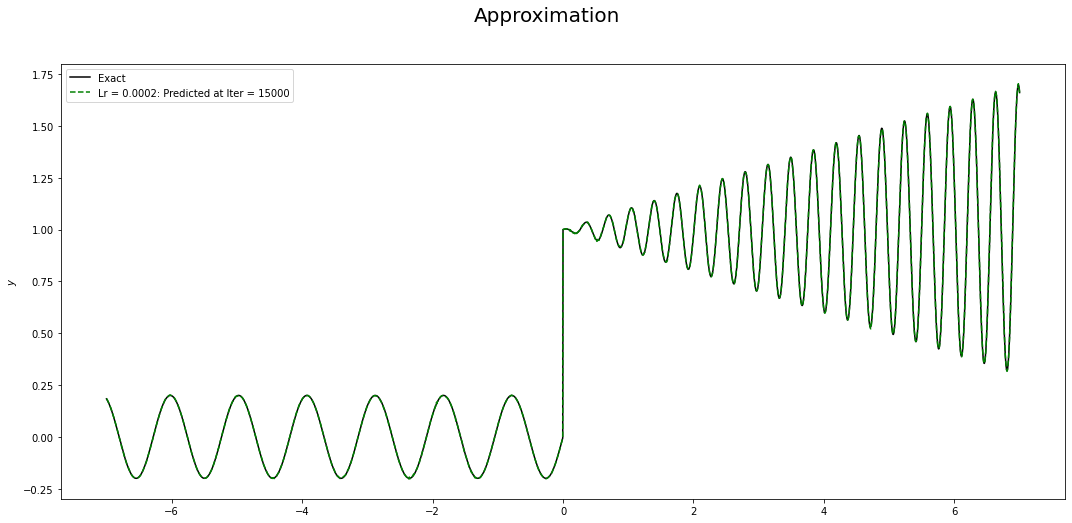

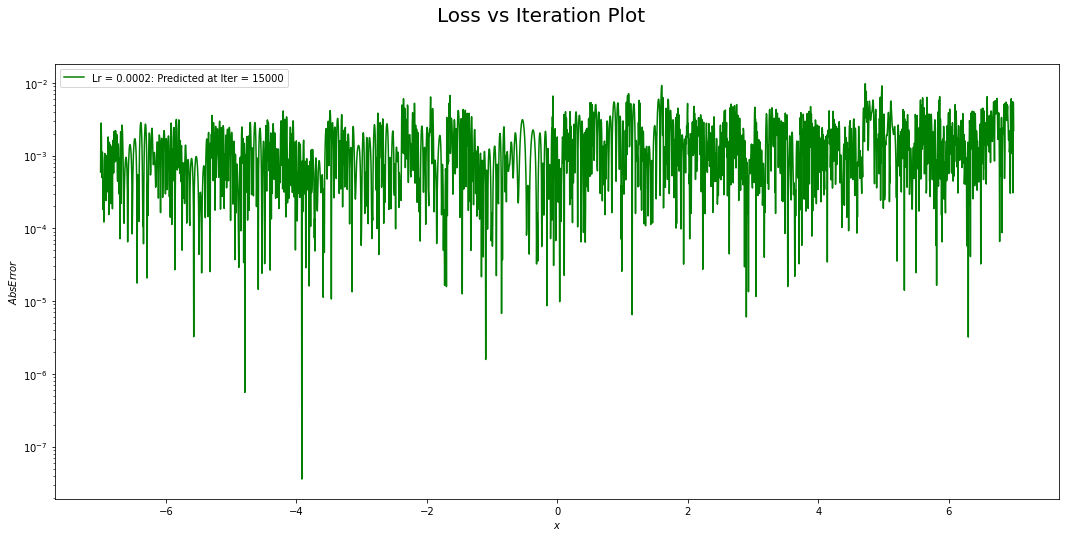

In [14]:
## Approximation ##
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)
fig = plt.figure(figsize=[18, 8])
plt.plot(x, y, 'k',  label = 'Exact')
# plt.plot(x[0:-1], Sol_15000_1[0:-1,-1], 'g--',  label = 'Lr = 0.0001: Predicted at Iter = 60000')
plt.plot(x, Sol_15000_1, 'g--',  label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.ylabel('$y$')
plt.legend(loc='best')
fig.suptitle('Approximation', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Approx_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')


## Abs Error ###
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)[0:-1,-1].flatten()[:, None]
error_15000_1 = np.abs(Sol_15000_1 - y[0:-1])
fig = plt.figure(figsize=[18, 8])
plt.semilogy(x[0:-1], error_15000_1, 'g', label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.xlabel('$x$')
plt.ylabel('$Abs Error$')
plt.legend(loc='best')
# plt.legend(loc='best')
fig.suptitle('Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Abs_loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

This works!!!


## Experimentation
Layer = 1 + 10*1000+1 \\
with namx = 30,000 \\
No Layaer wise slope control parameter


Text(0.5, 0.98, 'Function')

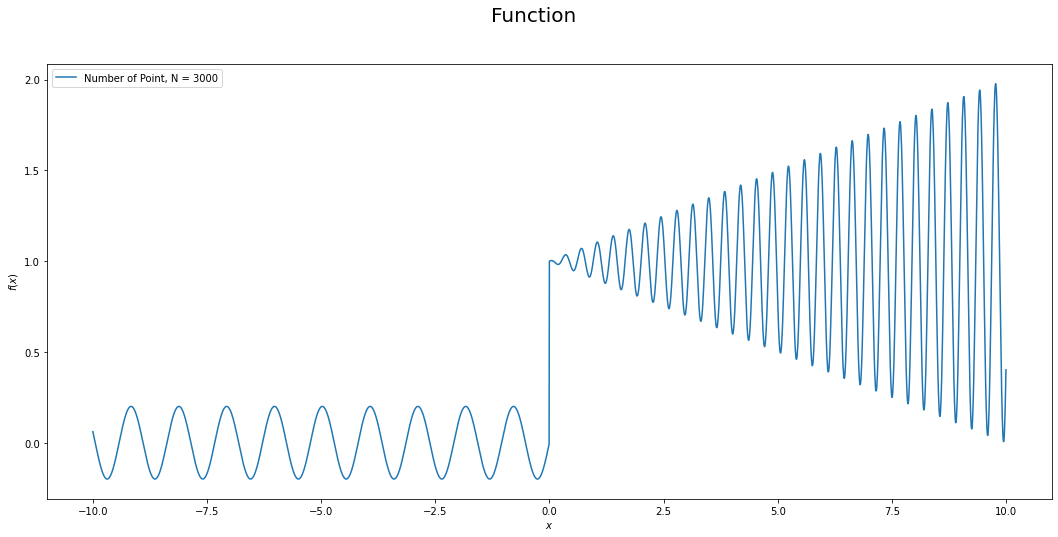

In [21]:
##====== Data Preparation ==========###
N = 3000
x = np.linspace(-10, 10, N + 1)
lb = x[0] # lower bound
ub = x[-1] # upper bound
x = np.reshape(x, (-1, 1))

# # N = 300
# t = np.linspace(-1, 1, N + 1)
# y = np.sin(np.tanh(t))
# # y_ = np.cos(np.sin(t))
# y = np.sin(2*np.pi*x)

y = non_linear_step_function(x)
# y = sig.sawtooth(2 * np.pi * 1 * x)
fig = plt.figure(figsize=[18, 8])
# plt.plot(x,y)
plt.plot(x, y, label = 'Number of Point, N = %d' %N)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')
fig.suptitle('Function', fontsize=20)
# fig.savefig('/content/drive/My Drive/Colab Notebooks/Current/sawtooth_wave.png')

For Learning rate =  0.0002
Steps : 10000, loss: 9.383e-02
Steps : 15000, loss: 5.291e-02
Steps : 30000, loss: 5.652e-03
Training time: 00:02:14.04
Model saved in path: /content/gdrive/My Drive/Colab Notebooks/Experiment/Model/New_Architecture_-7<=x<=7.ckpt


Text(0.5, 0.98, 'Objective Loss vs Iteration Plot')

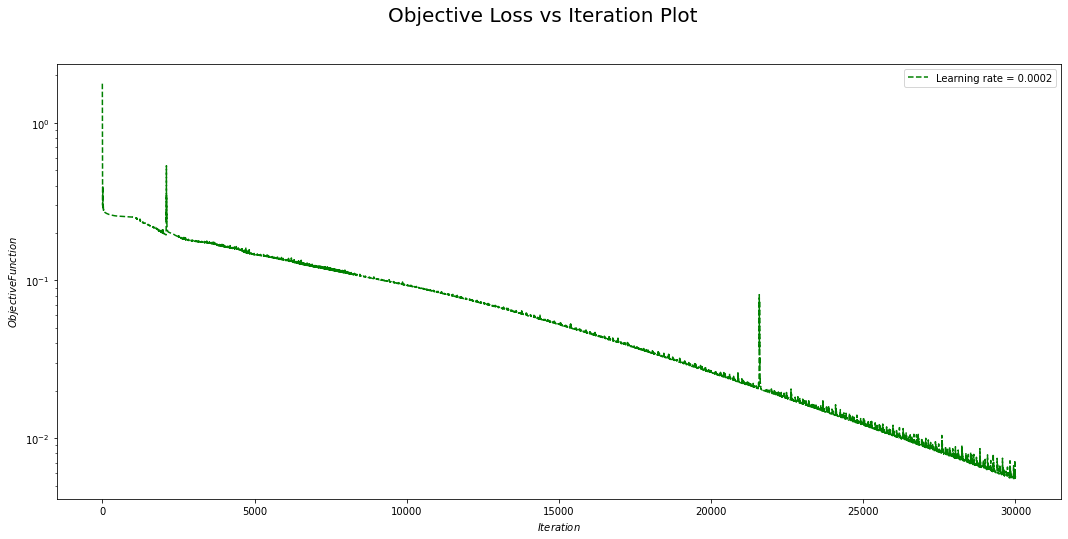

In [22]:
######## 30,000 Iteration #########
###################################
#
#        Solution Begins          #
#
###################################
# def hyper_parameters_A(size):
#     a = tf.Variable(tf.constant(0.1, shape=size))
#     return a

# def hyper_parameters(size):
#     return tf.Variable(tf.random_normal(shape=size, mean=0.0, stddev=0.1))
####=================== Initialization of the hyperparameters ==================#########
##================= Xavier initilizer ========######
def xavier_init(size):
    in_dim = size[0]
    out_dim = size[1]
    xavier_stddev = np.sqrt(2/(in_dim + out_dim))
    return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev = xavier_stddev),dtype=tf.float32)

def hyper_parameters_A(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a

def hyper_parameters_B(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a


# def hyper_parameters_B(size):
#     b = tf.Variable(tf.constant(0.1, shape=size))
#     return b

def hyper_parameters(size):
    # return tf.Variable(tf.random_normal(shape=size, mean = 0.0, stddev= 0.1))
    return tf.Variable(xavier_init(size=size))

# def DNN(X, W, b, a_NLLAF, a_LLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#         if i % 2 == 0:
#             A = a_LLLAF[i]*tf.sin(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#         else:
#             A = a_LLLAF[i]*tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y

def DNN(X, W, b, a_NLLAF, lb, ub):
    A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
    L = len(W)
    for i in range(L-1):
        if i % 2 == 0:
            A = tf.sin(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
        else:
            A = tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
    Y = tf.add(tf.matmul(A, W[-1]), b[-1])
    return Y
    
# def DNN(X, W, b, a_NLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#       A = tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y


def predict():
    pass


####======= Network Architecture ===========#########
layers = [1] + 10*[100] + [1]
W = [hyper_parameters([layers[l-1], layers[l]]) for l in range(1, len(layers))]
b = [hyper_parameters([1, layers[l]]) for l in range(1, len(layers))]
a_NLLAF = [hyper_parameters_A([1, layers[l]]) for l in range(1, len(layers))]
# a_LLLAF = [hyper_parameters_B([1, 1]) for l in range(1, len(layers))]
# # print(a)

##======= Slope recovery term =======###
def S(a):
    y = 0
    for i in range(0, len(a)):
        y += tf.exp(tf.reduce_mean(a[i]))
    slope_term = 1/(tf.reduce_mean(y)) 
    return slope_term

######=========== Placeholder ==============########
x_train = tf.placeholder(tf.float32, shape=[None, 1])
y_train = tf.placeholder(tf.float32, shape=[None, 1])

###============== Neural Network ================####
# y_pred = DNN(x_train, W, b, a_NLLAF, lb, ub)
# y_pred = DNN(x_train, W, b, a_NLLAF, a_LLLAF, lb, ub)
y_pred = DNN(x_train, W, b, a_NLLAF, lb, ub)
##========================== Obj Function ===============###
obj_loss = tf.reduce_mean(tf.square(y_pred - y_train)) + S(a_NLLAF) + S(a_NLLAF) #+ S(a_LLLAF)  ## Rick function -> need to minimizer
##========================== Obj Function ===============###
# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])))))

# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])) 
#             + tf.exp(tf.reduce_mean(a[5])))))

MSE_history = []
Solution_history = []

start_time = time.time()

# for i in range(1, 2):
    
    # train = tf.train.AdamOptimizer(10**-i).minimize(loss)
lr = 2.0e-4
optimizer = tf.train.AdamOptimizer(lr).minimize(obj_loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

sess = tf.Session()

# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
#   print('and then re-execute this cell.')
# else:
#   print(gpu_info)



init = tf.global_variables_initializer()   


sess.run(init)
nmax = 30000
n = 0

MSE_hist = []
Sol = []
# a_hist = []

print("For Learning rate = ", lr)

while n <= nmax:
    n = n + 1
    obj_loss_, _, y_ = sess.run([obj_loss, optimizer, y_pred], feed_dict={x_train: x, y_train: y})
    # err = obj_loss
    # a_value = sess.run(a, feed_dict={x_train: x, y_train: y})
    # a_value = np.concatenate(a_value, axis=1)
    # a_value = np.reshape(a_value, (-1, 1))
    # a_hist.append(a_value)

    MSE_hist.append(obj_loss_)    # a_hist = []
    # print(y_.shape)

    if n == 10000 or n == 15000 or n == 30000:
        # Sol.append(y_)
        # print(y_.shape)
        print('Steps : %d, loss: %0.3e'%(n, obj_loss_))
    if n == 30000:
        Sol.append(y_)

MSE_history.append(MSE_hist)
Solution_history.append(Sol)

##==================!Start Time!====================##
elapsed = time.time() - start_time                  
hours, rem = divmod(elapsed, 3600)                
minutes, seconds = divmod(rem, 60)                 
print('Training time: {:0>2}:{:0>2}:{:05.2f}'.format(int(hours), int(minutes), seconds))

MSE_history.append(MSE_hist)
# trainLoss_history.append(train_loss_hist)
# testLoss_history.append(test_loss_hist)
Solution_history.append(Sol)
##==================!End Time!======================##

##================ Save the Model ================##
# /content/gdrive/My Drive/Colab Notebooks/Experiment
save_path = saver.save(sess, "/content/gdrive/My Drive/Colab Notebooks/Experiment/Model/New_Architecture_-7<=x<=7.ckpt")
print("Model saved in path: %s" % save_path)


### Risk function ####
fig = plt.figure(figsize=[18, 8])
plt.semilogy(MSE_history[0], 'g--', label = 'Learning rate = %0.4f' %lr)
plt.xlabel('$Iteration$')
plt.ylabel('$Objective Function$')
plt.legend(loc='best')
fig.suptitle('Objective Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/MSE_Loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

Text(0.5, 0.98, 'Loss vs Iteration Plot')

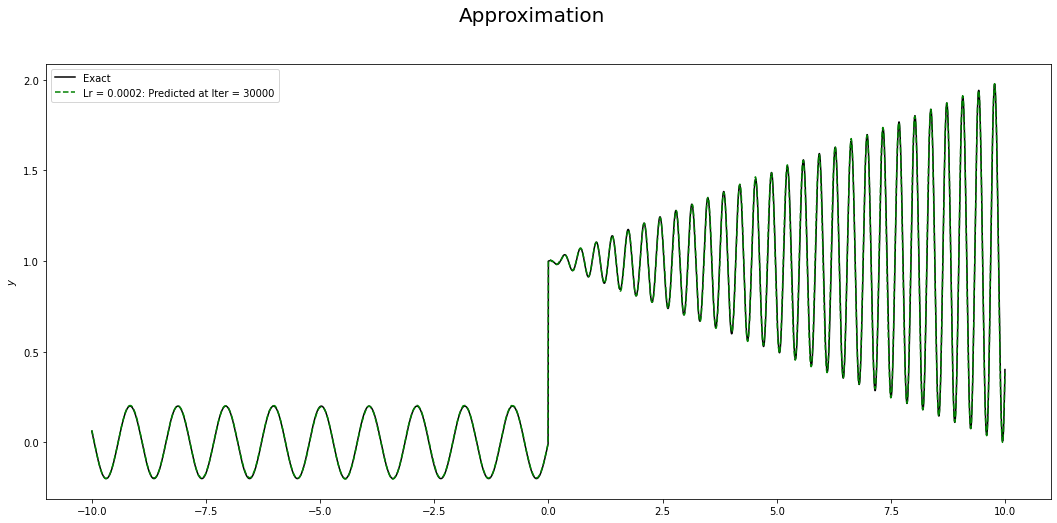

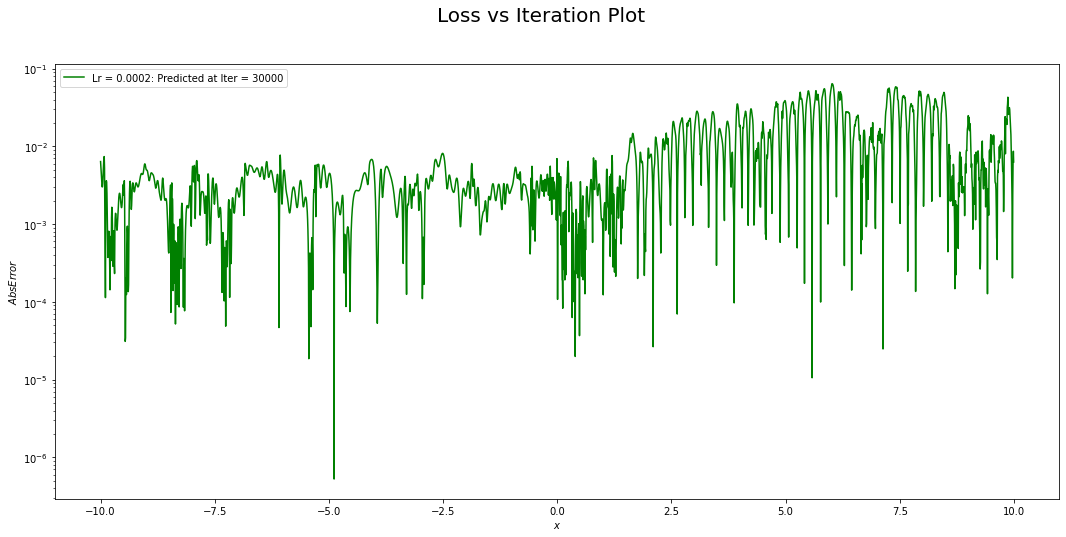

In [23]:
## Approximation ##
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)
fig = plt.figure(figsize=[18, 8])
plt.plot(x, y, 'k',  label = 'Exact')
# plt.plot(x[0:-1], Sol_15000_1[0:-1,-1], 'g--',  label = 'Lr = 0.0001: Predicted at Iter = 60000')
plt.plot(x, Sol_15000_1, 'g--',  label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.ylabel('$y$')
plt.legend(loc='best')
fig.suptitle('Approximation', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Approx_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')


## Abs Error ###
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)[0:-1,-1].flatten()[:, None]
error_15000_1 = np.abs(Sol_15000_1 - y[0:-1])
fig = plt.figure(figsize=[18, 8])
plt.semilogy(x[0:-1], error_15000_1, 'g', label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.xlabel('$x$')
plt.ylabel('$Abs Error$')
plt.legend(loc='best')
# plt.legend(loc='best')
fig.suptitle('Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Abs_loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

# Sawtoothwave Function

Text(0.5, 0.98, 'Function')

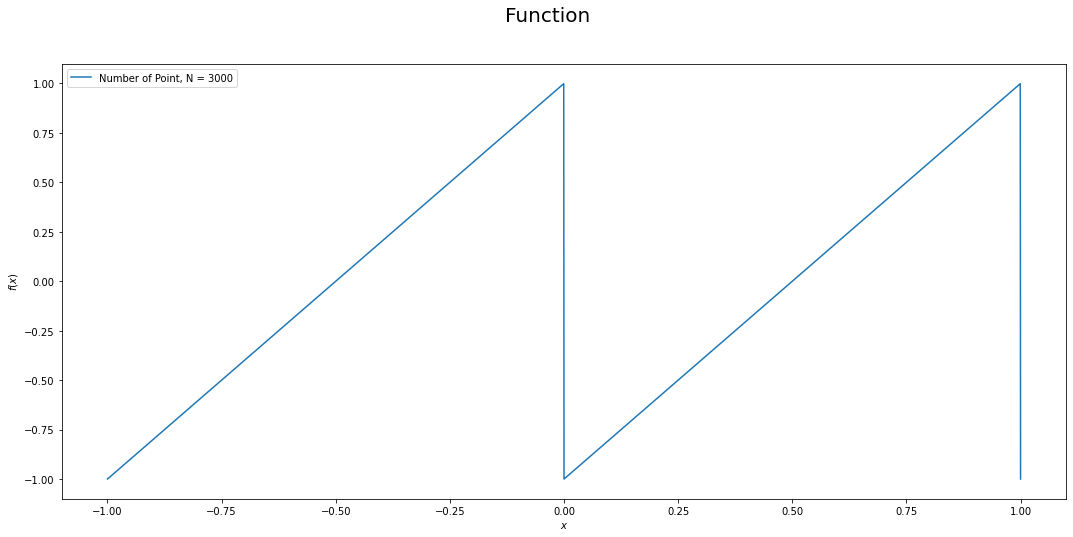

In [32]:
##====== Data Preparation ==========###
N = 3000
x = np.linspace(-1, 1, N + 1)
lb = x[0] # lower bound
ub = x[-1] # upper bound
x = np.reshape(x, (-1, 1))


# y = non_linear_step_function(x)
y = sig.sawtooth(2 * np.pi * 1 * x)
fig = plt.figure(figsize=[18, 8])
# plt.plot(x,y)
plt.plot(x, y, label = 'Number of Point, N = %d' %N)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')
fig.suptitle('Function', fontsize=20)
# fig.savefig('/content/drive/My Drive/Colab Notebooks/Current/sawtooth_wave.png')

## Conventional Architecture

For Learning rate =  0.0001
Steps : 2000, loss: 1.744e-01
Steps : 8000, loss: 1.235e-01
Steps : 15000, loss: 7.434e-02
Training time: 00:00:50.31
Model saved in path: /content/gdrive/My Drive/Colab Notebooks/Experiment/Model/New_Architecture_-7<=x<=7.ckpt


Text(0.5, 0.98, 'Loss vs Iteration Plot')

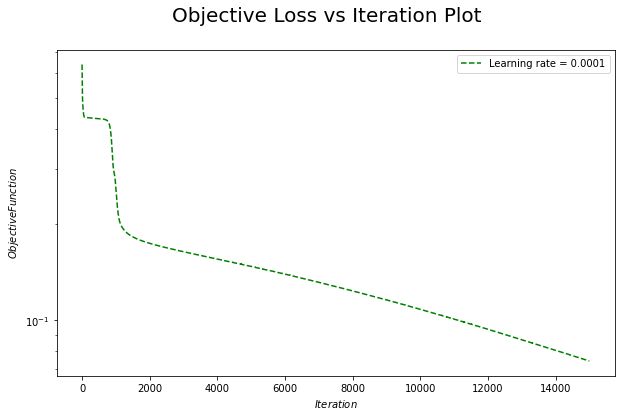

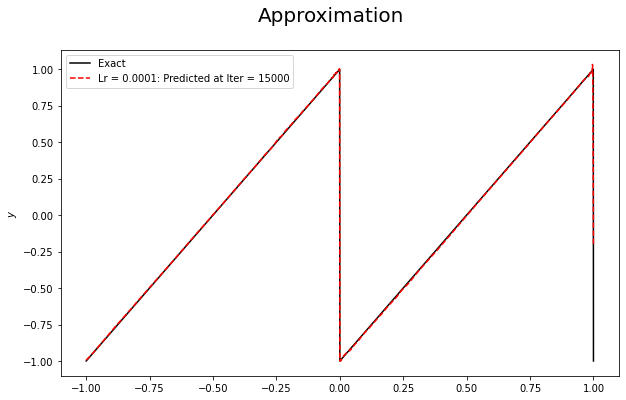

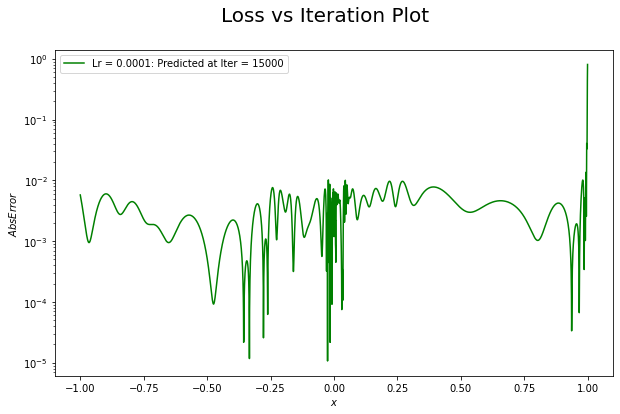

In [60]:
###################################
#         Sawtoothwave            #
#        Solution Begins          #
#                                 #
###################################
# def hyper_parameters_A(size):
#     a = tf.Variable(tf.constant(0.1, shape=size))
#     return a

# def hyper_parameters(size):
#     return tf.Variable(tf.random_normal(shape=size, mean=0.0, stddev=0.1))
####=================== Initialization of the hyperparameters ==================#########
##================= Xavier initilizer ========######
def xavier_init(size):
    in_dim = size[0]
    out_dim = size[1]
    xavier_stddev = np.sqrt(2/(in_dim + out_dim))
    return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev = xavier_stddev),dtype=tf.float32)

def hyper_parameters_A(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a

def hyper_parameters_B(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a


# def hyper_parameters_B(size):
#     b = tf.Variable(tf.constant(0.1, shape=size))
#     return b

def hyper_parameters(size):
    # return tf.Variable(tf.random_normal(shape=size, mean = 0.0, stddev= 0.1))
    return tf.Variable(xavier_init(size=size))

# def DNN(X, W, b, a_NLLAF, a_LLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#         if i % 2 == 0:
#             A = a_LLLAF[i]*tf.sin(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#         else:
#             A = a_LLLAF[i]*tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y
    
def DNN(X, W, b, a_NLLAF, lb, ub):
    A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
    L = len(W)
    for i in range(L-1):
      A = tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
    Y = tf.add(tf.matmul(A, W[-1]), b[-1])
    return Y


def predict():
    pass



####======= Network Architecture ===========#########
# layers = [1] + 10*[100] + [1]
layers = [1] + 4*[50] + [1]
W = [hyper_parameters([layers[l-1], layers[l]]) for l in range(1, len(layers))]
b = [hyper_parameters([1, layers[l]]) for l in range(1, len(layers))]
a_NLLAF = [hyper_parameters_A([1, layers[l]]) for l in range(1, len(layers))]
# a_LLLAF = [hyper_parameters_B([1, 1]) for l in range(1, len(layers))]
# # print(a)

##======= Slope recovery term =======###
def S(a):
    y = 0
    for i in range(0, len(a)):
        y += tf.exp(tf.reduce_mean(a[i]))
    slope_term = 1/(tf.reduce_mean(y)) 
    return slope_term

######=========== Placeholder ==============########
x_train = tf.placeholder(tf.float32, shape=[None, 1])
y_train = tf.placeholder(tf.float32, shape=[None, 1])

###============== Neural Network ================####
y_pred = DNN(x_train, W, b, a_NLLAF, lb, ub)
# y_pred = DNN(x_train, W, b, a_NLLAF, a_LLLAF, lb, ub)

##========================== Obj Function ===============###
obj_loss = tf.reduce_mean(tf.square(y_pred - y_train)) + S(a_NLLAF) #+ S(a_LLLAF)  ## Rick function -> need to minimizer
##========================== Obj Function ===============###
# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])))))

# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])) 
#             + tf.exp(tf.reduce_mean(a[5])))))

MSE_history = []
Solution_history = []

start_time = time.time()

# for i in range(1, 2):
    
    # train = tf.train.AdamOptimizer(10**-i).minimize(loss)
lr = 1.0e-4
optimizer = tf.train.AdamOptimizer(lr).minimize(obj_loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

sess = tf.Session()

init = tf.global_variables_initializer()   


sess.run(init)
nmax = 15000
n = 0

MSE_hist = []
Sol = []
# a_hist = []

print("For Learning rate = ", lr)

while n <= nmax:
    n = n + 1
    obj_loss_, _, y_ = sess.run([obj_loss, optimizer, y_pred], feed_dict={x_train: x, y_train: y})
    # err = obj_loss
    # a_value = sess.run(a, feed_dict={x_train: x, y_train: y})
    # a_value = np.concatenate(a_value, axis=1)
    # a_value = np.reshape(a_value, (-1, 1))
    # a_hist.append(a_value)

    MSE_hist.append(obj_loss_)    # a_hist = []
    # print(y_.shape)

    if n == 2000 or n == 8000 or n == 15000:
        # Sol.append(y_)
        # print(y_.shape)
        print('Steps : %d, loss: %0.3e'%(n, obj_loss_))
    if n == 15000:
        Sol.append(y_)

MSE_history.append(MSE_hist)
Solution_history.append(Sol)

##==================!Start Time!====================##
elapsed = time.time() - start_time                  
hours, rem = divmod(elapsed, 3600)                
minutes, seconds = divmod(rem, 60)                 
print('Training time: {:0>2}:{:0>2}:{:05.2f}'.format(int(hours), int(minutes), seconds))

MSE_history.append(MSE_hist)
# trainLoss_history.append(train_loss_hist)
# testLoss_history.append(test_loss_hist)
Solution_history.append(Sol)
##==================!End Time!======================##

##================ Save the Model ================##
# /content/gdrive/My Drive/Colab Notebooks/Experiment
save_path = saver.save(sess, "/content/gdrive/My Drive/Colab Notebooks/Experiment/Model/New_Architecture_-7<=x<=7.ckpt")
print("Model saved in path: %s" % save_path)


### Risk function ####
fig = plt.figure(figsize=[10, 6])
plt.semilogy(MSE_history[0], 'g--', label = 'Learning rate = %0.4f' %lr)
plt.xlabel('$Iteration$')
plt.ylabel('$Objective Function$')
plt.legend(loc='best')
fig.suptitle('Objective Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/MSE_Loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

## Approximation ##
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)
fig = plt.figure(figsize=[10, 6])
plt.plot(x, y, 'k',  label = 'Exact')
# plt.plot(x[0:-1], Sol_15000_1[0:-1,-1], 'g--',  label = 'Lr = 0.0001: Predicted at Iter = 60000')
plt.plot(x, Sol_15000_1, 'r--',  label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.ylabel('$y$')
plt.legend(loc='best')
fig.suptitle('Approximation', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Approx_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')


## Abs Error ###
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)[0:-1,-1].flatten()[:, None]
error_15000_1 = np.abs(Sol_15000_1 - y[0:-1])
fig = plt.figure(figsize=[10, 6])
plt.semilogy(x[0:-1], error_15000_1, 'g', label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.xlabel('$x$')
plt.ylabel('$Abs Error$')
plt.legend(loc='best')
# plt.legend(loc='best')
fig.suptitle('Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Abs_loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

## Modified Architecture
Modification: only the architecture.

For Learning rate =  0.0002
Steps : 50000, loss: 1.481e-03
Steps : 100000, loss: 1.278e-03
Steps : 150000, loss: 1.033e-03
Training time: 00:07:16.29
Model saved in path: /content/gdrive/My Drive/Colab Notebooks/Experiment/Model/New_Architecture_-7<=x<=7.ckpt


Text(0.5, 0.98, 'Objective Loss vs Iteration Plot')

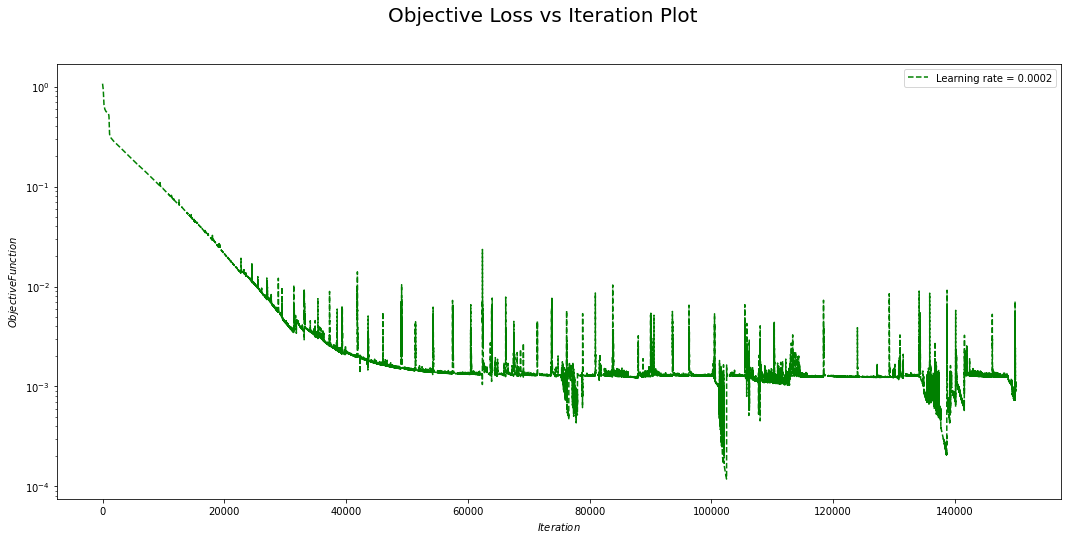

In [61]:
###################################
#
#        Solution Begins          #
#
###################################
# def hyper_parameters_A(size):
#     a = tf.Variable(tf.constant(0.1, shape=size))
#     return a

# def hyper_parameters(size):
#     return tf.Variable(tf.random_normal(shape=size, mean=0.0, stddev=0.1))
####=================== Initialization of the hyperparameters ==================#########
##================= Xavier initilizer ========######
def xavier_init(size):
    in_dim = size[0]
    out_dim = size[1]
    xavier_stddev = np.sqrt(2/(in_dim + out_dim))
    return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev = xavier_stddev),dtype=tf.float32)

def hyper_parameters_A(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a

def hyper_parameters_B(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a


# def hyper_parameters_B(size):
#     b = tf.Variable(tf.constant(0.1, shape=size))
#     return b

def hyper_parameters(size):
    # return tf.Variable(tf.random_normal(shape=size, mean = 0.0, stddev= 0.1))
    return tf.Variable(xavier_init(size=size))

def DNN(X, W, b, a_NLLAF, a_LLLAF, lb, ub):
    A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
    L = len(W)
    for i in range(L-1):
        if i % 2 == 0:
            A = a_LLLAF[i]*tf.sin(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
        else:
            A = a_LLLAF[i]*tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
    Y = tf.add(tf.matmul(A, W[-1]), b[-1])
    return Y

# def DNN(X, W, b, a_NLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#         if i % 2 == 0:
#             A = tf.sin(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#         else:
#             A = tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y
    
# def DNN(X, W, b, a_NLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#       A = tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y

    
# def DNN(X, W, b, a_NLLAF, a_LLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#       A = a_LLLAF[i]*tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y


def predict():
    pass

####======= Network Architecture ===========#########
layers = [1] + 4*[50] + [1]
W = [hyper_parameters([layers[l-1], layers[l]]) for l in range(1, len(layers))]
b = [hyper_parameters([1, layers[l]]) for l in range(1, len(layers))]
a_NLLAF = [hyper_parameters_A([1, layers[l]]) for l in range(1, len(layers))]
a_LLLAF = [hyper_parameters_B([1, 1]) for l in range(1, len(layers))]
# # print(a)

##======= Slope recovery term =======###
def S(a):
    y = 0
    for i in range(0, len(a)):
        y += tf.exp(tf.reduce_mean(a[i]))
    slope_term = 1/(tf.reduce_mean(y)) 
    return slope_term

######=========== Placeholder ==============########
x_train = tf.placeholder(tf.float32, shape=[None, 1])
y_train = tf.placeholder(tf.float32, shape=[None, 1])

###============== Neural Network ================####
# y_pred = DNN(x_train, W, b, a_NLLAF, lb, ub)
y_pred = DNN(x_train, W, b, a_NLLAF, a_LLLAF, lb, ub)
# y_pred = DNN(x_train, W, b, a_NLLAF, lb, ub)
##========================== Obj Function ===============###
obj_loss = tf.reduce_mean(tf.square(y_pred - y_train)) + S(a_NLLAF)  + S(a_NLLAF) # + S(a_LLLAF)  ## Rick function -> need to minimizer
##========================== Obj Function ===============###
# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])))))

# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])) 
#             + tf.exp(tf.reduce_mean(a[5])))))

MSE_history = []
Solution_history = []

start_time = time.time()

# for i in range(1, 2):
    
    # train = tf.train.AdamOptimizer(10**-i).minimize(loss)
lr = 2.0e-4
optimizer = tf.train.AdamOptimizer(lr).minimize(obj_loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

sess = tf.Session()

init = tf.global_variables_initializer()   


sess.run(init)
nmax = 150000
n = 0

MSE_hist = []
Sol = []
# a_hist = []

print("For Learning rate = ", lr)

while n <= nmax:
    n = n + 1
    obj_loss_, _, y_ = sess.run([obj_loss, optimizer, y_pred], feed_dict={x_train: x, y_train: y})
    # err = obj_loss
    # a_value = sess.run(a, feed_dict={x_train: x, y_train: y})
    # a_value = np.concatenate(a_value, axis=1)
    # a_value = np.reshape(a_value, (-1, 1))
    # a_hist.append(a_value)

    MSE_hist.append(obj_loss_)    # a_hist = []
    # print(y_.shape)

    if n == 50000 or n == 100000 or n == 150000:
        # Sol.append(y_)
        # print(y_.shape)
        print('Steps : %d, loss: %0.3e'%(n, obj_loss_))
    if n == 150000:
        Sol.append(y_)

MSE_history.append(MSE_hist)
Solution_history.append(Sol)

##==================!Start Time!====================##
elapsed = time.time() - start_time                  
hours, rem = divmod(elapsed, 3600)                
minutes, seconds = divmod(rem, 60)                 
print('Training time: {:0>2}:{:0>2}:{:05.2f}'.format(int(hours), int(minutes), seconds))

MSE_history.append(MSE_hist)
# trainLoss_history.append(train_loss_hist)
# testLoss_history.append(test_loss_hist)
Solution_history.append(Sol)
##==================!End Time!======================##

##================ Save the Model ================##
# /content/gdrive/My Drive/Colab Notebooks/Experiment
save_path = saver.save(sess, "/content/gdrive/My Drive/Colab Notebooks/Experiment/Model/New_Architecture_-7<=x<=7.ckpt")
print("Model saved in path: %s" % save_path)


### Risk function ####
fig = plt.figure(figsize=[18, 8])
plt.semilogy(MSE_history[0], 'g--', label = 'Learning rate = %0.4f' %lr)
plt.xlabel('$Iteration$')
plt.ylabel('$Objective Function$')
plt.legend(loc='best')
fig.suptitle('Objective Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/MSE_Loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

Text(0.5, 0.98, 'Loss vs Iteration Plot')

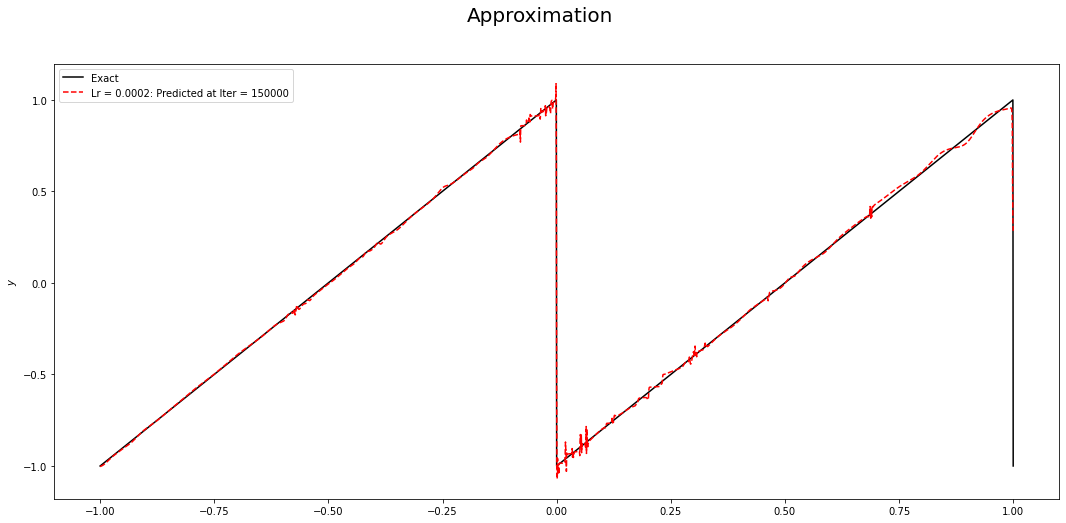

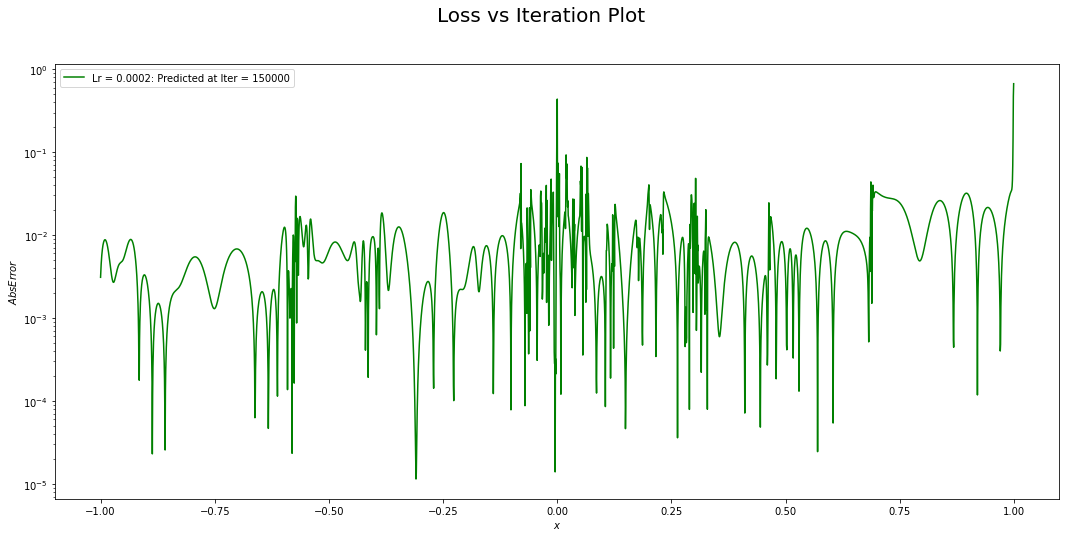

In [63]:
## Approximation ##
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)
fig = plt.figure(figsize=[18, 8])
plt.plot(x, y, 'k',  label = 'Exact')
# plt.plot(x[0:-1], Sol_15000_1[0:-1,-1], 'g--',  label = 'Lr = 0.0001: Predicted at Iter = 60000')
plt.plot(x, Sol_15000_1, 'r--',  label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.ylabel('$y$')
plt.legend(loc='best')
fig.suptitle('Approximation', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Approx_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')


## Abs Error ###
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)[0:-1,-1].flatten()[:, None]
error_15000_1 = np.abs(Sol_15000_1 - y[0:-1])
fig = plt.figure(figsize=[18, 8])
plt.semilogy(x[0:-1], error_15000_1, 'g', label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.xlabel('$x$')
plt.ylabel('$Abs Error$')
plt.legend(loc='best')
# plt.legend(loc='best')
fig.suptitle('Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Abs_loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

## Modification:
Slope control parameter: exp()---->tanh()

For Learning rate =  0.0003
Steps : 50000, loss: 4.051e-01
Steps : 100000, loss: 4.018e-01
Steps : 150000, loss: 4.017e-01
Training time: 00:07:16.21


Text(0.5, 0.98, 'Objective Loss vs Iteration Plot')

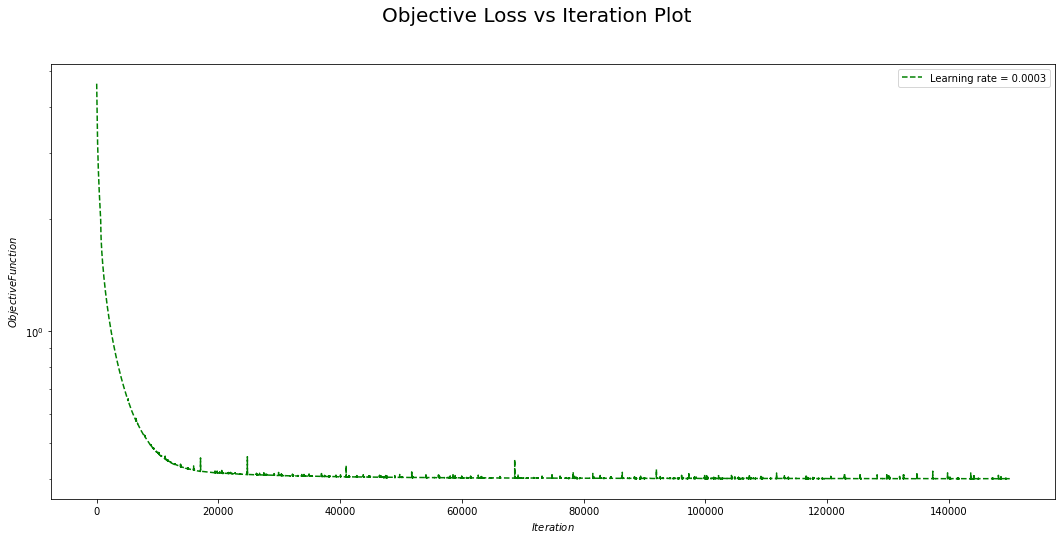

In [67]:
###################################
#         Sawtooth wave           #
#        Solution Begins          #
#  Modified: exp()-->tanh()       #
###################################
# def hyper_parameters_A(size):
#     a = tf.Variable(tf.constant(0.1, shape=size))
#     return a

# def hyper_parameters(size):
#     return tf.Variable(tf.random_normal(shape=size, mean=0.0, stddev=0.1))
####=================== Initialization of the hyperparameters ==================#########
##================= Xavier initilizer ========######
def xavier_init(size):
    in_dim = size[0]
    out_dim = size[1]
    xavier_stddev = np.sqrt(2/(in_dim + out_dim))
    return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev = xavier_stddev),dtype=tf.float32)

def hyper_parameters_A(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a

def hyper_parameters_B(size):
    a = tf.Variable(tf.constant(0.1, shape=size))
    return a


# def hyper_parameters_B(size):
#     b = tf.Variable(tf.constant(0.1, shape=size))
#     return b

def hyper_parameters(size):
    # return tf.Variable(tf.random_normal(shape=size, mean = 0.0, stddev= 0.1))
    return tf.Variable(xavier_init(size=size))

def DNN(X, W, b, a_NLLAF, a_LLLAF, lb, ub):
    A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
    L = len(W)
    for i in range(L-1):
        if i % 2 == 0:
            A = a_LLLAF[i]*tf.sin(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
        else:
            A = a_LLLAF[i]*tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
    Y = tf.add(tf.matmul(A, W[-1]), b[-1])
    return Y

# def DNN(X, W, b, a_NLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#         if i % 2 == 0:
#             A = tf.sin(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#         else:
#             A = tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y
    
# def DNN(X, W, b, a_NLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#       A = tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y

    
# def DNN(X, W, b, a_NLLAF, a_LLLAF, lb, ub):
#     A =  X #2.0 * (X - lb) / (ub - lb) - 1.0
#     L = len(W)
#     for i in range(L-1):
#       A = a_LLLAF[i]*tf.tanh(10*a_NLLAF[i]*tf.add(tf.matmul(A, W[i]), b[i]))
#     Y = tf.add(tf.matmul(A, W[-1]), b[-1])
#     return Y


def predict():
    pass

####======= Network Architecture ===========#########
layers = [1] + 4*[50] + [1]
W = [hyper_parameters([layers[l-1], layers[l]]) for l in range(1, len(layers))]
b = [hyper_parameters([1, layers[l]]) for l in range(1, len(layers))]
a_NLLAF = [hyper_parameters_A([1, layers[l]]) for l in range(1, len(layers))]
a_LLLAF = [hyper_parameters_B([1, 1]) for l in range(1, len(layers))]
# # print(a)

##======= Slope recovery term =======###
def S(a):
    y = 0
    for i in range(0, len(a)):
        y += tf.tanh(tf.reduce_mean(a[i]))
    slope_term = 1/(tf.reduce_mean(y)) 
    return slope_term

######=========== Placeholder ==============########
x_train = tf.placeholder(tf.float32, shape=[None, 1])
y_train = tf.placeholder(tf.float32, shape=[None, 1])

###============== Neural Network ================####
# y_pred = DNN(x_train, W, b, a_NLLAF, lb, ub)
y_pred = DNN(x_train, W, b, a_NLLAF, a_LLLAF, lb, ub)
# y_pred = DNN(x_train, W, b, a_NLLAF, lb, ub)
##========================== Obj Function ===============###
obj_loss = tf.reduce_mean(tf.square(y_pred - y_train)) + S(a_NLLAF)  + S(a_NLLAF) #+ S(a_LLLAF)  ## Rick function -> need to minimizer
##========================== Obj Function ===============###
# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])))))

# loss = tf.reduce_mean(tf.square(y_pred - y_train)) + (1.0 / (tf.reduce_mean(tf.exp(tf.reduce_mean(
#         a[0])) + tf.exp(tf.reduce_mean(a[1])) + tf.exp(tf.reduce_mean(a[2])) + tf.exp(tf.reduce_mean(a[3])) + tf.exp(tf.reduce_mean(a[4])) 
#             + tf.exp(tf.reduce_mean(a[5])))))

MSE_history = []
Solution_history = []

start_time = time.time()

# for i in range(1, 2):
    
    # train = tf.train.AdamOptimizer(10**-i).minimize(loss)
lr = 3.0e-4
optimizer = tf.train.AdamOptimizer(lr).minimize(obj_loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

sess = tf.Session()

init = tf.global_variables_initializer()   


sess.run(init)
nmax = 150000
n = 0

MSE_hist = []
Sol = []
# a_hist = []

print("For Learning rate = ", lr)

while n <= nmax:
    n = n + 1
    obj_loss_, _, y_ = sess.run([obj_loss, optimizer, y_pred], feed_dict={x_train: x, y_train: y})
    # err = obj_loss
    # a_value = sess.run(a, feed_dict={x_train: x, y_train: y})
    # a_value = np.concatenate(a_value, axis=1)
    # a_value = np.reshape(a_value, (-1, 1))
    # a_hist.append(a_value)

    MSE_hist.append(obj_loss_)    # a_hist = []
    # print(y_.shape)

    if n == 50000 or n == 100000 or n == 150000:
        # Sol.append(y_)
        # print(y_.shape)
        print('Steps : %d, loss: %0.3e'%(n, obj_loss_))
    if n == 150000:
        Sol.append(y_)

MSE_history.append(MSE_hist)
Solution_history.append(Sol)

##==================!Start Time!====================##
elapsed = time.time() - start_time                  
hours, rem = divmod(elapsed, 3600)                
minutes, seconds = divmod(rem, 60)                 
print('Training time: {:0>2}:{:0>2}:{:05.2f}'.format(int(hours), int(minutes), seconds))

MSE_history.append(MSE_hist)
# trainLoss_history.append(train_loss_hist)
# testLoss_history.append(test_loss_hist)
Solution_history.append(Sol)
##==================!End Time!======================##

##================ Save the Model ================##
# /content/gdrive/My Drive/Colab Notebooks/Experiment
# save_path = saver.save(sess, "/content/gdrive/My Drive/Colab Notebooks/Experiment/Model/New_Architecture_-7<=x<=7.ckpt")
# print("Model saved in path: %s" % save_path)


### Risk function ####
fig = plt.figure(figsize=[18, 8])
plt.semilogy(MSE_history[0], 'g--', label = 'Learning rate = %0.4f' %lr)
plt.xlabel('$Iteration$')
plt.ylabel('$Objective Function$')
plt.legend(loc='best')
fig.suptitle('Objective Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/MSE_Loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

Text(0.5, 0.98, 'Loss vs Iteration Plot')

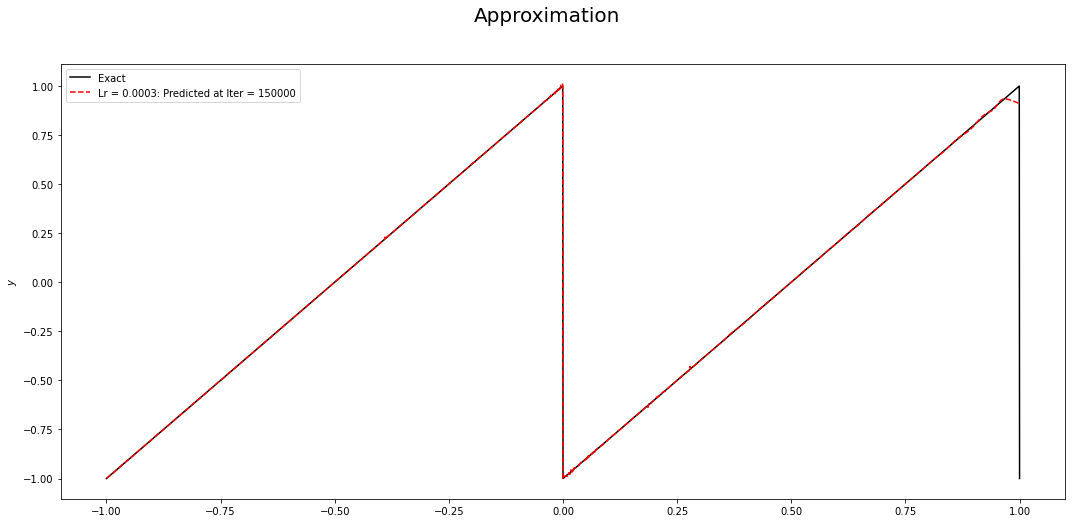

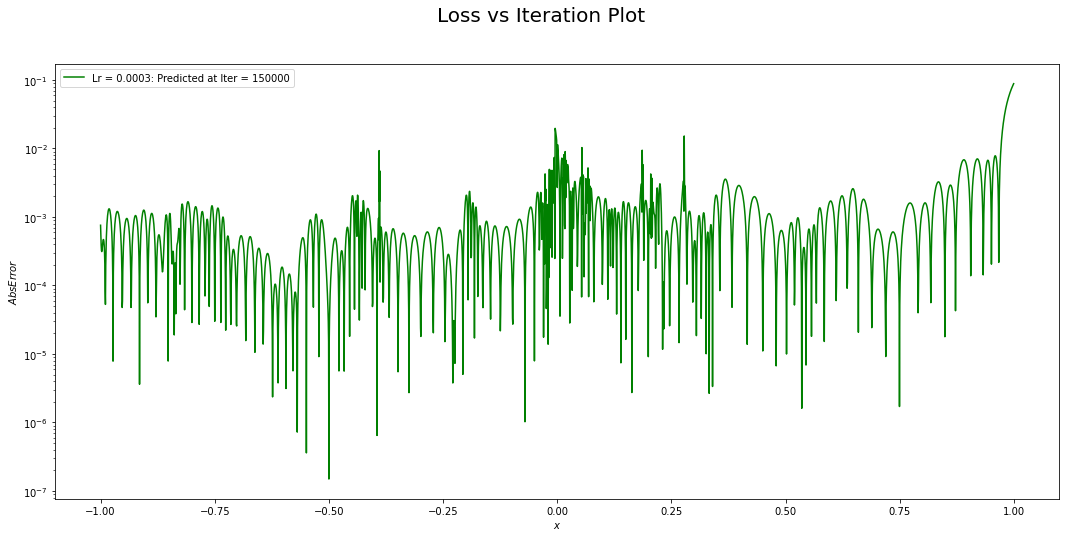

In [68]:
## Approximation ##
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)
fig = plt.figure(figsize=[18, 8])
plt.plot(x, y, 'k',  label = 'Exact')
# plt.plot(x[0:-1], Sol_15000_1[0:-1,-1], 'g--',  label = 'Lr = 0.0001: Predicted at Iter = 60000')
plt.plot(x, Sol_15000_1, 'r--',  label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.ylabel('$y$')
plt.legend(loc='best')
fig.suptitle('Approximation', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Approx_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')


## Abs Error ###
Sol_15000_1 = np.asarray(Solution_history[0]).reshape(len(x),1)[0:-1,-1].flatten()[:, None]
error_15000_1 = np.abs(Sol_15000_1 - y[0:-1])
fig = plt.figure(figsize=[18, 8])
plt.semilogy(x[0:-1], error_15000_1, 'g', label = 'Lr = %0.4f: Predicted at Iter = %d' %(lr, nmax))
plt.xlabel('$x$')
plt.ylabel('$Abs Error$')
plt.legend(loc='best')
# plt.legend(loc='best')
fig.suptitle('Loss vs Iteration Plot', fontsize=20)
# fig.savefig('/content/gdrive/My Drive/Colab Notebooks/stepFunction/Abs_loss_adam_lr:0.0001_N=3000_Itr=60000_sawtooth_layers = [1] + 10*[1000] + [1].png')

## Square Wave